In [1]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
import os
from pytesseract import image_to_string
from PIL import Image

# Function to extract features from an image
def extract_features(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Edge density feature
    edges = cv2.Canny(gray, 100, 200)
    edge_density = np.sum(edges) / edges.size
    
    # Text density feature using OCR
    text = image_to_string(Image.open(image_path))
    text_density = len(text) / (gray.shape[0] * gray.shape[1])
    
    return [edge_density, text_density]

# Get a list of all image files in the specified directory
def get_image_paths(image_dir):
    return [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.lower().endswith('.jpg')]

# Path to the directory where all your images are stored
image_directory = '/Users/jadeja19/Documents/Hiwi iktd/data set/Transform dataset/schraube/01Schraubedrawcorrected'

# Extracting features from all images
image_paths = get_image_paths(image_directory)
features = np.array([extract_features(path) for path in image_paths])

# Use KMeans to cluster the images
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)
labels = kmeans.labels_

# Output the cluster assignment for each image
for image_path, label in zip(image_paths, labels):
    print(f'{image_path} - Cluster: {label}')


/Users/jadeja19/Documents/Hiwi iktd/data set/Transform dataset/schraube/01Schraubedrawcorrected/page_9_12.jpg - Cluster: 2
/Users/jadeja19/Documents/Hiwi iktd/data set/Transform dataset/schraube/01Schraubedrawcorrected/page_14_4.jpg - Cluster: 0
/Users/jadeja19/Documents/Hiwi iktd/data set/Transform dataset/schraube/01Schraubedrawcorrected/page_2_5.jpg - Cluster: 2
/Users/jadeja19/Documents/Hiwi iktd/data set/Transform dataset/schraube/01Schraubedrawcorrected/page_5_13.jpg - Cluster: 2
/Users/jadeja19/Documents/Hiwi iktd/data set/Transform dataset/schraube/01Schraubedrawcorrected/page_14_5.jpg - Cluster: 2
/Users/jadeja19/Documents/Hiwi iktd/data set/Transform dataset/schraube/01Schraubedrawcorrected/page_47.jpg - Cluster: 2
/Users/jadeja19/Documents/Hiwi iktd/data set/Transform dataset/schraube/01Schraubedrawcorrected/page_9_11.jpg - Cluster: 2
/Users/jadeja19/Documents/Hiwi iktd/data set/Transform dataset/schraube/01Schraubedrawcorrected/page_12_1.jpg - Cluster: 0
/Users/jadeja19/Doc

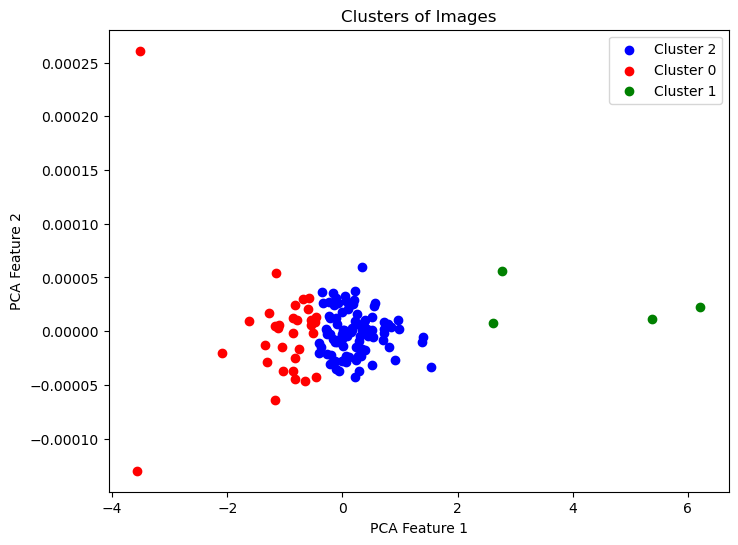

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import cv2
import os
from pytesseract import image_to_string
from PIL import Image
import matplotlib.pyplot as plt

# Function to extract features from an image
def extract_features(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Edge density feature
    edges = cv2.Canny(gray, 100, 200)
    edge_density = np.sum(edges) / edges.size
    
    # Text density feature using OCR
    text = image_to_string(Image.open(image_path))
    text_density = len(text) / (gray.shape[0] * gray.shape[1])
    
    return [edge_density, text_density]

# Function to get image paths
def get_image_paths(image_dir):
    return [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.lower().endswith('.jpg')]

# Load images and extract features
image_directory = '/Users/jadeja19/Documents/Hiwi iktd/data set/Transform dataset/schraube/01Schraubedrawcorrected'
image_paths = get_image_paths(image_directory)
features = np.array([extract_features(path) for path in image_paths])

# Use KMeans to cluster the images into 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Plot the reduced features in a scatter plot
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, label in enumerate(kmeans.labels_):
    plt.scatter(reduced_features[i, 0], reduced_features[i, 1], color=colors[label], label=f'Cluster {label}')
plt.title('Clusters of Images')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

# Create a legend without duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()
